In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

### Data Preprocessing

In [3]:
# Read the original csv file
df = pd.read_csv('NYC_Jobs.csv')
# Delete irrelevant columns
df1 = df.drop(columns = ['Job ID','Posting Date','Posting Updated','Process Date','Agency','Level','Civil Service Title','To Apply','Title Code No'])
df1.head()

,Posting Type,# Of Positions,Business Title,Job Category,Full-Time/Part-Time indicator,Salary Range From,Salary Range To,Salary Frequency,Work Location,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Post Until
0,Internal,1,Secretary to Division Chief,Legal Affairs,F,50000.0,50000.0,Annual,"100 Church St., N.Y.",Comm Lit,The Division Chief Secretary for the Commercia...,1. An associate degree from an accredited col...,"Candidates must have knowledge of Outlook, Wor...",NaN,NaN,NaN,NaN,New York City residency is generally required ...,2019-01-26T00:00:00.000
1,External,1,"Legislative Representative, Mayorâ€™s Office o...",Health,F,56990.0,91800.0,Annual,42-09 28th Street,Intergovernmental Affairs,The Mayorâ€™s Office of City Legislative Affai...,1. A baccalaureate degree from an accredited c...,"Excellent written, oral and interpersonal skil...",Additional Information **IMPORTANT NOTES ...,NaN,NaN,NaN,New York City residency is generally required ...,2019-05-16T00:00:00.000
2,Internal,2,Community Coordinator â€“ DSE/TAHU,"Public Safety, Inspections, & Enforcement",F,52524.0,60403.0,Annual,100 Gold Street,Administration,The Office of Enforcement and Neighborhood Ser...,1. A baccalaureate degree from an accredited c...,â€¢\tCandidates who possess strong verbal and ...,NaN,NaN,Note: Selected candidate may be assigned to an...,NaN,New York City residency is generally required ...,2019-01-29T00:00:00.000
3,External,2,Community Coordinator â€“ DSE/TAHU,"Public Safety, Inspections, & Enforcement",F,52524.0,60403.0,Annual,100 Gold Street,Administration,The Office of Enforcement and Neighborhood Ser...,1. A baccalaureate degree from an accredited c...,â€¢\tCandidates who possess strong verbal and ...,NaN,NaN,Note: Selected candidate may be assigned to an...,NaN,New York City residency is generally required ...,2019-01-29T00:00:00.000
4,Internal,1,Case Management Team Leader,Social Services,F,59023.0,67876.0,Annual,"1910 Monterey Ave., Bronx",FIA Operations-NM,The Family Independence Administration (FIA) i...,1. A baccalaureate degree from an accredited c...,â€¢ Superior leadership/supervisory skills. â...,**LOAN FORGIVENESS The Federal government pro...,Monday-Friday 9AM-5PM (Flex),NaN,NaN,New York City Residency is not required for th...,2019-02-01T00:00:00.000


In [4]:
# Count Job Category
pd.DataFrame(df1['Job Category'].value_counts()).head()

,Job Category
"Engineering, Architecture, & Planning",568
Health,501
"Technology, Data & Innovation",429
Legal Affairs,227
Administration & Human Resources,194


In [101]:
# Uppercase all the words in data in order to search keyword
df2 = df1.apply(lambda x: x.astype(str).str.upper())
# Sort software related jobs using keyword Data and Technology in job categories
df3 = df2[df2['Job Category'].str.contains('DATA|TECHNOLOGY').replace(np.nan, False, regex=True)]
pd.DataFrame(df3['Job Category'].value_counts())

,Job Category
"TECHNOLOGY, DATA & INNOVATION",429
"ENGINEERING, ARCHITECTURE, & PLANNING TECHNOLOGY, DATA & INNOVATION",66
INFORMATION TECHNOLOGY & TELECOMMUNICATIONS,34
"HEALTH TECHNOLOGY, DATA & INNOVATION",26
"TECHNOLOGY, DATA & INNOVATION POLICY, RESEARCH & ANALYSIS",13
"ADMINISTRATION & HUMAN RESOURCES TECHNOLOGY, DATA & INNOVATION",7
"ENGINEERING, ARCHITECTURE, & PLANNING TECHNOLOGY, DATA & INNOVATION POLICY, RESEARCH & ANALYSIS",6
"FINANCE, ACCOUNTING, & PROCUREMENT TECHNOLOGY, DATA & INNOVATION",3
"TECHNOLOGY, DATA & INNOVATION SOCIAL SERVICES",3
"COMMUNICATIONS & INTERGOVERNMENTAL AFFAIRS TECHNOLOGY, DATA & INNOVATION",2


In [6]:
# Then search software related keywords in business title
df4 = df3[df3['Business Title'].str.contains('INFORMATION|SOFTWARE|DATA|NETWORK|ANALYST|IT|DEVELOPER').replace(np.nan, False, regex=True)]
df4.head()

,Posting Type,# Of Positions,Business Title,Job Category,Full-Time/Part-Time indicator,Salary Range From,Salary Range To,Salary Frequency,Work Location,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Post Until
18,INTERNAL,1,DEPUTY CHIEF OF INFORMATION TECHNOLOGY,"TECHNOLOGY, DATA & INNOVATION",F,164104.0,168433.0,ANNUAL,"100 CHURCH ST., N.Y.",INFORMATION TECHNOLOGY,THE DEPUTY CHIEF OF INFORMATION TECHNOLOGY IS ...,1. A MASTER'S DEGREE IN COMPUTER SCIENCE FROM ...,THE SUCCESSFUL CANDIDATE WILL HAVE 5-6 YEARS O...,CANDIDATE MUST BE SERVING PERMANENTLY IN THE C...,NAN,NAN,NAN,NEW YORK CITY RESIDENCY IS NOT REQUIRED FOR TH...,2019-02-14T00:00:00.000
50,INTERNAL,1,ANALYST,"TECHNOLOGY, DATA & INNOVATION POLICY, RESEARCH...",F,60660.0,68244.0,ANNUAL,255 GREENWICH STREET,CAPITAL AND MGMT SYSTEMS,TASK FORCE: \t\tINFORMATION SYSTEMS UNIT:\t\t...,1. A BACCALAUREATE DEGREE FROM AN ACCREDITED C...,QUALIFICATIONS: Â€¢\tSTRONG COMPUTER PROGRAM...,"REQUIREMENTS: ANALYST ($60,660+): BACHELOR'S...",NAN,255 GREENWICH STREET,NAN,NEW YORK CITY RESIDENCY IS GENERALLY REQUIRED ...,NAN
51,EXTERNAL,1,ANALYST,"TECHNOLOGY, DATA & INNOVATION POLICY, RESEARCH...",F,60660.0,68244.0,ANNUAL,255 GREENWICH STREET,CAPITAL AND MGMT SYSTEMS,TASK FORCE: \t\tINFORMATION SYSTEMS UNIT:\t\t...,1. A BACCALAUREATE DEGREE FROM AN ACCREDITED C...,QUALIFICATIONS: Â€¢\tSTRONG COMPUTER PROGRAM...,"REQUIREMENTS: ANALYST ($60,660+): BACHELOR'S...",NAN,255 GREENWICH STREET,NAN,NEW YORK CITY RESIDENCY IS GENERALLY REQUIRED ...,NAN
52,EXTERNAL,1,UNIT HEAD,"TECHNOLOGY, DATA & INNOVATION POLICY, RESEARCH...",F,95522.0,95522.0,ANNUAL,255 GREENWICH STREET,CAPITAL AND MGMT SYSTEMS,TASK FORCE: \t\tINFORMATION SYSTEMS UNIT:\t\t...,1. A BACCALAUREATE DEGREE FROM AN ACCREDITED C...,QUALIFICATIONS: Â€¢\tABILITY TO WORK CALMLY ...,"REQUIREMENTS: UNIT HEAD ($95,522+): BACHELOR'...",NAN,255 GREENWICH STREET,NAN,NEW YORK CITY RESIDENCY IS GENERALLY REQUIRED ...,NAN
58,INTERNAL,1,QUALITY ANALYST - DIGITAL SOLUTIONS,"TECHNOLOGY, DATA & INNOVATION",NAN,74354.0,87000.0,ANNUAL,"33 BEAVER ST, NEW YORK NY",MANAGEMENT INFORMATION SYSTEMS,THE NEW YORK CITY TAXI AND LIMOUSINE COMMISSIO...,1. A BACCALAUREATE DEGREE FROM AN ACCREDITED C...,Â€¢\t5+ YEARS OF QUALITY ANALYST EXPERIENCE IN...,Â€¢\tWILLING TO TRAVEL WITHIN THE FIVE BOROUGH...,NAN,"33 BEAVER ST, NEW YORK NY",NAN,NEW YORK CITY RESIDENCY IS NOT REQUIRED FOR TH...,2019-01-28T00:00:00.000


### Category overview

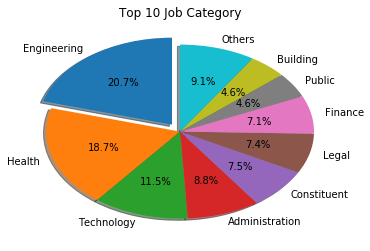

In [7]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt

df=df1.loc[:,'Job Category']
df=df.dropna()
a=pd.value_counts(df)
data=[]
for i in df:
    z=i
    for m in i:
        if m in string.punctuation+',':
            i=i.replace(m,'')
            z=i.replace(m,'')
    data.append(z)
df0=pd.DataFrame(data)
data1=[]
data=[]
for i in df0.loc[:,0]:
    data1.append(i.split(' ' or ','))
for index in range(len(data1)):
    data.append(data1[index][0])
data_new=pd.Series(data)
a=pd.value_counts(data_new)

labels=list(a.index)
value=list(a)
labels[9]='Others'
labels=np.delete(labels,[10,11,12,13,14,15],axis=0)

value[9]=sum(value[9:16])
value=np.delete(value,[10,11,12,13,14,15],axis=0)

explode=(0.1,0,0,0,0,0,0,0,0,0)
plt.pie(value,autopct='%.1f%%',labels=labels,explode=explode,
        shadow=True,startangle=90)
plt.title('Top 10 Job Category')
plt.show()


### Position available time

In [119]:
from bokeh.plotting import figure, output_file, show
df = pd.read_csv('NYC_Jobs.csv')
df1 = df.drop(columns = ['Job ID','Posting Updated','Post Until','Process Date','Agency','Level','Civil Service Title','To Apply','Title Code No'])
df1.head() # version 1 deletes some useless columns
pd.DataFrame(df1['Job Category'].value_counts())
df2 = df1.apply(lambda x: x.astype(str).str.upper())

#filter out part-time
mon_df2=df2[df2['Salary Range From']>'1000']
#classify the data according to keywords
mon_df=pd.DataFrame(df2['Posting Date'])
month=['-01-','-02-','-03-','-04-','-05-','-06-','-07-','-08-','-09-','-10-','-11-','-12-']
job_numb_permonth=np.zeros((12,1))
#month_m=np.array([['Jan.','Feb.','Mar.','Apr.','May.','June.','July.','Aug.','Sept.','Oct.','Nov.','Dec.']]).T
month_m=np.array([[1,2,3,4,5,6,7,8,9,10,11,12]]).T

#count
for i in range(len(mon_df)):
    for j in range(len(month)):
        if month[j] in mon_df.loc[i,'Posting Date']:
            job_numb_permonth[j,0]=job_numb_permonth[j,0]+1
#month_m=pd.DataFrame(month_m)
#job_numb_permonth=pd.DataFrame(job_numb_permonth)

#figure
p = figure(title="Positions per month", # title of figure
           x_axis_label='Months', 
           y_axis_label='Number of positions',
           width= 400,  # figure width
           height = 300) # figure height
p.line(month_m[:,0], job_numb_permonth[:,0], legend=None, line_width=2)  # width of line
p.circle(month_m[:,0],job_numb_permonth[:,0],radius=0.2,fill_color='red')
show(p)

### Keyword Count

In [8]:
def split_count(x,s):
    '''
    This is a function aiming to split each string in a column and output a keyword count dataframe
    Input:
    x: should be a dataframe
    s: string of column name
    
    Output: pd.series
    '''
    assert isinstance(x,pd.core.frame.DataFrame)
    a=x[s].str.split(',|;| ', expand=True).stack().reset_index(level=1,drop=True).reset_index(drop=True).map(str.strip).value_counts()
    return a

### Requirement Count

In [118]:
# Count the requirement keyword
req = pd.DataFrame(split_count(df4,'Minimum Qual Requirements')) 
# req1 focuses on degree.
req1 = pd.DataFrame(req, index=['PH.D.','MASTER','BACCALAUREATE','COLLEGE'])
req1.rename(columns={0:'Count'}, inplace=True)
data0 = [go.Bar(
            x=req1.index,
            y=req1['Count']
    )]

py.iplot(data0, filename='general skill')

# req2 focuses on ability.
req2 = pd.DataFrame(req, index=['COMPUTER','PROFESSIONAL','DATA','EXPERIENCE','PROGRAMMING','SOFTWARE','SCIENCE'])
req2.rename(columns={0:'Count'}, inplace=True)
# req2.plot.bar()
# plt.title('Capability requirements keyword count')
# plt.show()



### Skill Count

In [16]:
skill = pd.DataFrame(split_count(df4,'Preferred Skills'))
# Count the general skill keyword
skill_1 = pd.DataFrame(skill,index=['EXPERIENCE','MANAGEMENT','DATA','COMMUNICATION','BUSINESS','SOFTWARE','NETWORK','TEAM','VERBAL','DESIGN','ENTERPRISE','ARCHITECTURE','ANALYSIS'])
skill_1.rename(columns={0:'Count'}, inplace=True)
# skill_1.plot.bar()
# plt.title('General skills keyword count')
# plt.show()
# data1 = [go.Bar(
#             x=skill_1.index,
#             y=skill_1['Count']
#     )]

# py.iplot(data1, filename='general skill')

# Count the programming language keyword
skill_2 = pd.DataFrame(skill,index=['SQL','MICROSOFT','JAVA','C#','JAVASCRIPT','HTML','PYTHON','C','C++'])
skill_2.rename(columns={0:'Count'}, inplace=True)
# skill_2.plot.bar()
# plt.title('Software skills keyword count')
# plt.show()

data2 = [go.Bar(
            x=skill_2.index,
            y=skill_2['Count']
    )]

py.iplot(data2, filename='basic-bar')

### Title keyword count

In [ ]:
title = pd.DataFrame(split_count(df4,'Business Title'))
# Count business title keyword in software related jobs
title1 = pd.DataFrame(title,index=['ANALYST','DEVELOPER','MANAGER','ENGINEER','ADMINISTRATOR','SPECIALIST','CHIEF','OFFICER','DIRECTOR','SUPERVISOR','TECHNICIAN'])
title1.rename(columns={0:'Count'},inplace=True)
title1
labels = title1.index
values = title1['Count']
trace = go.Pie(labels=labels, values=values)
py.iplot([trace])

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode("335 Adams Street, Brooklyn Ny")
print(location.longitude,location.latitude)


### title vs salary distribution

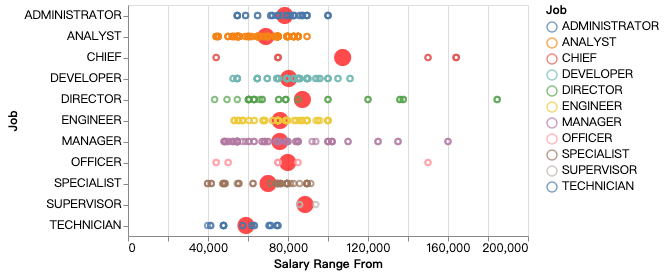

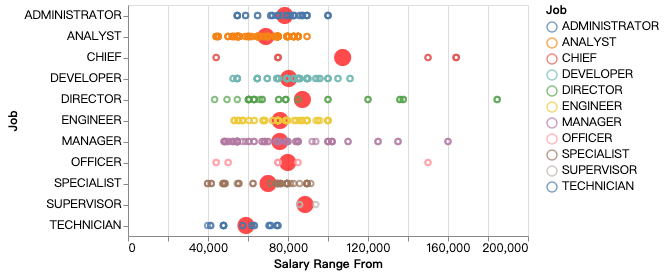

In [115]:
import altair as alt
from altair import Chart, load_dataset,X, Y, Axis, SortField, Scale
alt.renderers.enable('notebook')

#count specific title name in 'Business Title'
data_sf1=[]
data_sf2=[]
for i in df3.index:
    if 'ANALYST' in df3.loc[i,'Business Title'] and float(df3.loc[i,'Salary Range From'])>10000:
        data_sf1.append('ANALYST')
        data_sf2.append(float(df3.loc[i,'Salary Range From']))
    if 'DEVELOPER' in df3.loc[i,'Business Title']and float(df3.loc[i,'Salary Range From'])>10000:
        data_sf1.append('DEVELOPER')
        data_sf2.append(float(df3.loc[i,'Salary Range From']))
    if 'MANAGER' in df3.loc[i,'Business Title']and float(df3.loc[i,'Salary Range From'])>10000:
        data_sf1.append('MANAGER')
        data_sf2.append(float(df3.loc[i,'Salary Range From']))
    if 'ENGINEER' in df3.loc[i,'Business Title']and float(df3.loc[i,'Salary Range From'])>10000:
        data_sf1.append('ENGINEER')
        data_sf2.append(float(df3.loc[i,'Salary Range From']))
    if 'ANALYST' in df3.loc[i,'Business Title']and float(df3.loc[i,'Salary Range From'])>10000:
        data_sf1.append('ANALYST')
        data_sf2.append(float(df3.loc[i,'Salary Range From']))
    if 'ADMINISTRATOR' in df3.loc[i,'Business Title']and float(df3.loc[i,'Salary Range From'])>10000:
        data_sf1.append('ADMINISTRATOR')
        data_sf2.append(float(df3.loc[i,'Salary Range From']))
    if 'SPECIALIST' in df3.loc[i,'Business Title']and float(df3.loc[i,'Salary Range From'])>10000:
        data_sf1.append('SPECIALIST')
        data_sf2.append(float(df3.loc[i,'Salary Range From']))
    if 'CHIEF' in df3.loc[i,'Business Title']and float(df3.loc[i,'Salary Range From'])>10000:
        data_sf1.append('CHIEF')
        data_sf2.append(float(df3.loc[i,'Salary Range From']))
    if 'OFFICER' in df3.loc[i,'Business Title']and float(df3.loc[i,'Salary Range From'])>10000:
        data_sf1.append('OFFICER')
        data_sf2.append(float(df3.loc[i,'Salary Range From']))
    if 'DIRECTOR' in df3.loc[i,'Business Title']and float(df3.loc[i,'Salary Range From'])>10000:
        data_sf1.append('DIRECTOR')
        data_sf2.append(float(df3.loc[i,'Salary Range From']))
    if 'SUPERVISOR' in df3.loc[i,'Business Title']and float(df3.loc[i,'Salary Range From'])>10000:
        data_sf1.append('SUPERVISOR')
        data_sf2.append(float(df3.loc[i,'Salary Range From']))
    if 'TECHNICIAN' in df3.loc[i,'Business Title']and float(df3.loc[i,'Salary Range From'])>10000:
        data_sf1.append('TECHNICIAN')
        data_sf2.append(float(df3.loc[i,'Salary Range From']))

#calculate respective salary
data_sf1=pd.DataFrame(data_sf1)
data_sf2=pd.DataFrame(data_sf2)
data_sf1.rename(columns={data_sf1.columns[0]:'Job'},inplace=True)
data_sf2.rename(columns={data_sf2.columns[0]:'Salary Range From'},inplace=True)
data_conv=pd.concat([data_sf1,data_sf2],axis=1)
numb_job=pd.value_counts(data_sf1['Job'])
summation=np.zeros([len(numb_job),1])
for i in range(len(numb_job)):
    for j in range(len(data_conv)):
        if data_conv.loc[j,'Job']==numb_job.index[i]:
            summation[i,0]=summation[i,0]+float(data_conv.loc[j,'Salary Range From'])
for i in range(len(summation)):
    summation[i,0]=summation[i,0]/numb_job[i]
df_41=pd.DataFrame(numb_job.index)
df_41.rename(columns={df_41.columns[0]:'Job'},inplace=True)
df_51=pd.DataFrame(summation)
df_51.rename(columns={df_51.columns[0]:'Salary Range From'},inplace=True)
data_average=pd.concat([df_41,df_51],axis=1)

#fig
chart1=Chart(data_average)
h1=chart1.mark_point(size=300,filled=True,color='Red').encode(x='Salary Range From',y='Job')
chart2=Chart(data_conv)
h2=chart2.mark_point().encode(x='Salary Range From',y='Job',color='Job')
h1+h2

### Jobs category vs salary range (using altair)

In [ ]:
import altair as alt
alt.renderers.enable('notebook')

In [ ]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
from altair import Chart, load_dataset


#Data selection
df=df1.loc[:,['Job Category','Salary Range From']]
df=df.dropna()

#Filtering out hour salary and restore the annual salary
df=df[df['Salary Range From']>1000]
data=[]

#Reserve the first word in 'Job Description'
for i in df['Job Category']:
    z=i
    for m in i:
        if m in string.punctuation+',':
            i=i.replace(m,'')
            z=i.replace(m,'')
    data.append(z)
df_1=pd.DataFrame(data)
data1=[]
data=[]
data2=[]
for i in df_1.loc[:,0]:
    data1.append(i.split(' ' or ','))
for i in df.loc[:,'Salary Range From']:
    data2.append(i)
for index in range(len(data1)):
    data.append(data1[index][0])
df_2=pd.DataFrame(data)
df_2.rename(columns={df_2.columns[0]:'Job'},inplace=True)

#Sum up the number of positions in 'Other' category
index=0
for i in df_2.loc[:,'Job']:
    if i=='Policy' or i=='Communications' or i=='Social' or i=='Information' or i=='Clerical' or i=='Maintenance' or i=='Community':
        df_2.loc[index]='Others'
    index+=1
numb_job=pd.value_counts(df_2['Job'])

#Reserve the respective salary according to 'Job Description' 
df_3=pd.DataFrame(data2)
df_3.rename(columns={df_3.columns[0]:'Salary Range From'},inplace=True)
data_update=pd.concat([df_2,df_3],axis=1)
summation=np.zeros([1,len(numb_job)])
salary=np.zeros(len(numb_job))
for i in range(len(df_2)):
    for j in range(len(numb_job)):
        if data_update.loc[i,'Job']==numb_job.index[j]:
            summation[0,j]=summation[0,j]+data_update.loc[i,'Salary Range From']
for i in range(len(numb_job)):
    summation[0,i]=summation[0,i]/numb_job[i]

#Create a dataframe with updated 'Job Description' and 'Salary' 
df_4=pd.DataFrame(numb_job.index)
df_4.rename(columns={df_4.columns[0]:'Job'},inplace=True)
df_5=pd.DataFrame(np.transpose(summation))
df_5.rename(columns={df_5.columns[0]:'average'},inplace=True)
data_average=pd.concat([df_4,df_5],axis=1)
chart2=Chart(data_average)
chart2.mark_point().encode(x='average',y='Job',color='Job')
#plt.scatter(data_update['Salary Range From'],data_update['Job'])
#plt.show()

#Altair plot
chart=Chart(data_update)
chart.mark_point().encode(x='Salary Range From',y='Job',color='Job')

### Skill - Salary distribution

In [123]:
# plotly standard imports
import plotly.graph_objs as go
import plotly.plotly as py
import plotly


# Cufflinks wrapper on plotly
# import cufflinks

# Data science imports
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from plotly.offline import iplot
import plotly.figure_factory as ff
# cufflinks.go_offline()

# Set global theme
# cufflinks.set_config_file(world_readable=True, theme='pearl')

# import cmocean
import pandas as pd
import numpy as np

In [124]:
req_list =['ASSOCIATE','BACCALAUREATE','PROFESSIONAL/VENDOR',"MASTER|MASTERS|MASTER'S"]
pref_skill = pd.DataFrame(split_count(df4,'Preferred Skills'))
skill_list = ['SQL','MICROSOFT','JAVA','JAVASCRIPT','HTML','PYTHON']
salary_list = [[30000,40000],[40000,50000],[50000,60000],[60000,70000],[70000,80000],[80000,90000],[90000,100000],[100000,110000],[110000,120000],[120000,130000],[130000,140000]]

In [126]:
df4['Salary Range From'] = pd.to_numeric(df4['Salary Range From'])
df4['Salary Range To'] = pd.to_numeric(df4['Salary Range To'])
df4['mean_salary'] = df4[["Salary Range From","Salary Range To"]].mean(axis=1)
df4['mean_salary'] = df4['mean_salary'].dropna()

In [127]:
salary_list_str = [str(i) for i in salary_list]

In [128]:
x0 = df4[df4['Preferred Skills'].str.contains(skill_list[0])]['mean_salary'].values
x1 = df4[df4['Preferred Skills'].str.contains(skill_list[1])]['mean_salary'].values

x3 = df4[df4['Preferred Skills'].str.contains(skill_list[3])]['mean_salary'].values
x2 = df4[df4['Preferred Skills'].str.contains(skill_list[2]) & ~df4['Preferred Skills'].str.contains(skill_list[3])]['mean_salary'].values
x4 = df4[df4['Preferred Skills'].str.contains(skill_list[4])]['mean_salary'].values
x5 = df4[df4['Preferred Skills'].str.contains(skill_list[5])]['mean_salary'].values
x0=x0[x0>=10000]
x1=x1[x1>=10000]
x2=x2[x2>=10000]
x3=x3[x3>=10000]
x4=x4[x4>=10000]
x5=x5[x5>=10000]

In [132]:
# Group data together
hist_data = [x0[x0>=10000],x1[x1>=10000], x2[x2>=10000], x3[x3>=10000], x4[x4>=10000], x5[x5>=10000]]

group_labels = skill_list

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=5000, show_hist=False,curve_type='normal',
                         colors = ['pink','red','orange','skyblue','lightgreen','white'])
# fig['layout'].update(title='Skill / Salary Correlation')

fig['layout'].update(

    title= 'Skills - Salary Distribution',
    bargap = 0,

    autosize=False,
    width=800,
    height=500,
    margin=go.layout.Margin(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4,

    ),
    paper_bgcolor='black',
    plot_bgcolor='black',
    font= dict(color='white',
              family = 'roboto',
              size = 14),
    xaxis=dict(
#         fixedrange=True,
# #         side= 'top',
        title='Salary',
#         titlefont=dict(
#             family='Roboto',
#             size=16,
#             color='grey'
#         ),
        showticklabels=True,
        tickfont=dict(
            family='Roboto',
            size=11,
            color='white'
        ),
    ),
    yaxis=dict(
        fixedrange=True,

        showticklabels=False,
    ),   
)

# Plot!
py.iplot(fig, filename='Distplot with Multiple Datasets')
# py.plot(fig, filename='Skill-salary')

Layout({
    'autosize': False,
    'bargap': 0,
    'barmode': 'overlay',
    'font': {'color': 'white', 'family': 'roboto', 'size': 14},
    'height': 500,
    'hovermode': 'closest',
    'legend': {'traceorder': 'reversed'},
    'margin': {'b': 100, 'l': 50, 'pad': 4, 'r': 50, 't': 100},
    'paper_bgcolor': 'black',
    'plot_bgcolor': 'black',
    'title': {'text': 'Skills - Salary Distribution'},
    'width': 800,
    'xaxis': {'anchor': 'y2',
              'domain': [0.0, 1.0],
              'showticklabels': True,
              'tickfont': {'color': 'white', 'family': 'Roboto', 'size': 11},
              'title': {'text': 'Salary'},
              'zeroline': False},
    'yaxis': {'anchor': 'free', 'domain': [0.35, 1], 'fixedrange': True, 'position': 0.0, 'showticklabels': False},
    'yaxis2': {'anchor': 'x', 'domain': [0, 0.25], 'dtick': 1, 'showticklabels': False}
})

/Users/xiaoyin/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [133]:
x0 = df4[df4['Minimum Qual Requirements'].str.contains(req_list[0])]['mean_salary'].values
x1 = df4[df4['Minimum Qual Requirements'].str.contains(req_list[1])]['mean_salary'].values
x2 = df4[df4['Minimum Qual Requirements'].str.contains(req_list[2])]['mean_salary'].values
x3 = df4[df4['Minimum Qual Requirements'].str.contains(req_list[3])]['mean_salary'].values


In [134]:
# Group data together
hist_data = [x0[x0>=10000],x1[x1>=10000], x2, x3]

group_labels = req_list

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=5000, show_hist=False,curve_type='normal',
                        colors = ['red','orange','skyblue','lightgreen'])
# fig['layout'].update(title='Skill / Salary Correlation')
fig['layout'].update(

    title= 'Education - Salary Distribution',
    bargap = 0,

    autosize=False,
    width=800,
    height=500,
    margin=go.layout.Margin(
        l=100,
        r=50,
        b=100,
        t=100,
        pad=4,

    ),
    paper_bgcolor='black',
    plot_bgcolor='black',
    font= dict(color='white',
              family = 'roboto',
              size = 14),
    xaxis=dict(
        title='Salary',
    ),
    yaxis=dict(
        showticklabels=False,
    ),  
)

# Plot!
py.iplot(fig, filename='Distplot with Multiple Datasets')

Layout({
    'autosize': False,
    'bargap': 0,
    'barmode': 'overlay',
    'font': {'color': 'white', 'family': 'roboto', 'size': 14},
    'height': 500,
    'hovermode': 'closest',
    'legend': {'traceorder': 'reversed'},
    'margin': {'b': 100, 'l': 100, 'pad': 4, 'r': 50, 't': 100},
    'paper_bgcolor': 'black',
    'plot_bgcolor': 'black',
    'title': {'text': 'Education - Salary Distribution'},
    'width': 800,
    'xaxis': {'anchor': 'y2', 'domain': [0.0, 1.0], 'title': {'text': 'Salary'}, 'zeroline': False},
    'yaxis': {'anchor': 'free', 'domain': [0.35, 1], 'position': 0.0, 'showticklabels': False},
    'yaxis2': {'anchor': 'x', 'domain': [0, 0.25], 'dtick': 1, 'showticklabels': False}
})

### Location acquisition using geopy

In [13]:
import pandas as pd
import numpy as np


from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
df = pd.read_csv('NYC_Jobs.csv')
data_v1 = df.drop(columns = ['Job ID','Posting Date','Posting Updated','Process Date','Agency','Level','Civil Service Title'])
df2 = data_v1[data_v1['Job Category'].str.contains('Data|Technology|data').replace(np.nan, False, regex=True)]

def geocodeN(address):
    gps=Nominatim(user_agent="s4yu@ucsd.edu")
    try:
        location = gps.geocode(address,timeout = 10)
    except GeocoderTimedOut as e:
        print("Error: geocode failed on input %s "%(address))
    #location=gps.geocode(address, timeout = 10)
    return location.longitude,location.latitude

'''
the address of with suffix.
'''
a = np.array(address_with_ny)
b=a.tolist()
l1=[]
l2=[]
for c in b:
    '''
    the address could not be identified by geopy
    '''
    if c == ['421 East 26th Street NY NY']:
        lng, lat = -73.9750811, 40.7390769
    elif c == ['2 Lafayette St., N.Y.']:
        lng, lat = -74.0036284, 40.7140838
    elif c == ['4 Metrotech, Brooklyn Ny Ny']:
        lng, lat = -73.985332, 40.694279
    elif c == ['280 Broadway, 7th Floor, N.Y.']:
        lng, lat = -73.985332, 40.694279
    else: 
        lng, lat = geocodeN(c)
    l1.append(lng)
    l2.append(lat)

'''
the address of without suffix.
'''
c = np.array(address_without_ny)
d = a.tolist()
l3=[]
l4=[]
for c in b:
    '''
    the address could not be identified by geopy
    '''
    if c == ['2 Metro Tech New York']:
        lng, lat = -73.9857174, 40.69335
    elif c == ['96-05 Horace Harding Expway New York']:
        lng, lat = -73.8635554, 40.7349322 
    elif c == ['130 Stuyvesant Place, S.I. New York']:
        lng, lat = -74.0770569, 40.6427307 
    elif c == ['Analysis & Reporting New York']:
        continue
    elif c == ['30-30 Thomson Ave L I City Qns New York']:
        lng, lat = -73.9392201,40.7455819    
    elif c == ['28-11 Queens Plaza No., L.I.C. New York']:
        lng, lat = -73.9380597,40.7501382
    elif c == ['11 Metrotech Center New York']:
        lng, lat = -73.985245,40.694303
    elif c == ['34-02 Queens Boulevard Long Is New York']:
        lng, lat = -73.9371935,40.7489932
    else:
        lng, lat = geocodeN(c)
    l3.append(lng)
    l4.append(lat)

In [14]:
a = np.array(address_with_ny)
b=a.tolist()
c = np.array(address_without_ny)
d=c.tolist()
e = b+d
e.remove(['Analysis & Reporting New York'])
e.remove(['Analysis & Reporting New York'])

### Heatmap

In [67]:
import os
import folium
import numpy as np
from folium.plugins import HeatMap
import webbrowser

In [83]:
lat = l2+l4
lon = l1+l3
lst = [(lat[i],lon[i]) for i in range(len(lat))]
from collections import Counter
c = Counter(lst)
lst_c = list(dict(c).keys())
lst_count = list(dict(c).values())
lat_c = []
lon_c = []
for i in range(len(lst_c)):
    temp_lat = lst_c[i][0] 
    lat_c.append(temp_lat)
    temp_lon = lst_c[i][1]
    lon_c.append(temp_lon)

(40.7049076675386, -74.0113149481977)

In [109]:
df = pd.read_csv('NYC_Jobs.csv')
data_v1 = df.drop(columns = ['Job ID','Posting Date','Posting Updated','Process Date','Agency','Level','Civil Service Title'])
df2 = data_v1[data_v1['Job Category'].str.contains('Data|Technology|data').replace(np.nan, False, regex=True)]

In [110]:
df2 = df2.reset_index(drop = True)
df2['Salary'] = df2[['Salary Range From','Salary Range To']].mean(axis=1) 

for i in range(606):
    if df2['Salary Frequency'][i] == 'Hourly':
        df2['Salary'][i] =  df2['Salary'][i]*2088
    elif df2['Salary Frequency'][i] == 'Daily':
        df2['Salary'][i] =  df2['Salary'][i]*261

contains_ny = df2['Work Location'].str.contains('N.Y.|NYC|Ny|New York|N Y|NY')
address_with_ny = pd.DataFrame(df2['Work Location'][contains_ny])
address_without_ny = df2['Work Location'][~contains_ny]
salary_without_ny = df2['Salary'][~contains_ny]
salary_with_ny = df2['Salary'][contains_ny]
index = pd.Series(address_without_ny.index.values)
address_without_ny = pd.DataFrame([ '% s New York' % i for i in address_without_ny])
address_without_ny = address_without_ny.set_index(index)
address_without_ny = address_without_ny.rename(columns={0:'Work Location'})

/Users/xiaoyin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [108]:
len(l1)
len(address_with_ny)

1646

In [111]:
''' reform salary, location in the same dataframe'''

address_without_ny['Salary'] = salary_without_ny
address_with_ny['Salary'] = salary_with_ny
address_without_ny.drop(index=[89,90],inplace=True) 
address_with_ny['Longitude'] = l1
address_without_ny['Longitude'] = l3
address_with_ny['Latitude'] = l2
address_without_ny['Latitude'] = l4
address_without_ny = address_without_ny.reset_index(drop= True)
heatdata = pd.concat([address_without_ny, address_with_ny])
heatdata = heatdata.reset_index(drop= True)

#### heatmap: location vs job numbers

In [98]:
data1 = [[lat_c[i],lon_c[i],lst_count[i]] for i in range(len(lat_c))] 
map_osm = folium.Map(location=[40.7,-74],zoom_start=13)   
location_map = HeatMap(data1,gradient={0.2:'blue',0.5:'yellow',0.85:'orange',1:'red'}).add_to(map_osm)
map_osm.save('location_map.html')   
webbrowser.open('location_map.html')

True

#### heatmap: location vs salary

In [112]:
import folium
import webbrowser
from folium.plugins import HeatMap

data1 = [[heatdata['Latitude'][i],heatdata['Longitude'][i],heatdata['Salary'][i]/205480] for i in range(604)]
map_osm = folium.Map(location=[40.7,-74],zoom_start=12)    #original map
HeatMap(data1, gradient={.6:'blue', .8:'yellow',1:'red'},name = 'low,wyeufgqwufgiufyqriufgy').add_to(map_osm)  # add heatmap
map_osm.save('location_map2.html')     
webbrowser.open('location_map2.html') 

True